# Breast Cancer subtype prediction based on CNA 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###   get the patient id and corresponding cancer type 

In [2]:
df_cancer_type = pd.read_table('/Users/charlottewang/Desktop/practicum/MSK_noncore/brca_metabric/Cancer_Type_Detailed.txt')
df_cancer_type.loc[:,'Cancer Type Detailed'].value_counts()

Breast Invasive Ductal Carcinoma             1865
Breast Mixed Ductal and Lobular Carcinoma     269
Breast Invasive Lobular Carcinoma             192
Invasive Breast Carcinoma                     133
Breast Invasive Mixed Mucinous Carcinoma       25
Breast                                         21
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: Cancer Type Detailed, dtype: int64

### assgin numerical value for cancer types for classification (from most common to least)
0: Breast Invasive Ductal Carcinoma \
1: Breast Mixed Ductal and Lobular Carcinoma\
2: Breast Invasive Lobular Carcinoma\
3: Invasive Breast Carcinoma\
4: Breast Invasive Mixed Mucinous Carcinoma\
5: Breast\
6: Breast Angiosarcoma\
7: Metaplastic Breast Cancer 

In [3]:
df_cancer_type['Cancer'] = df_cancer_type['Cancer Type Detailed']
df_cancer_type['Cancer'] = df_cancer_type['Cancer'].map({'Breast Invasive Ductal Carcinoma':0, 
                                                         'Breast Mixed Ductal and Lobular Carcinoma':1,
                                                         'Breast Invasive Lobular Carcinoma':2,
                                                         'Invasive Breast Carcinoma':3,
                                                         'Breast Invasive Mixed Mucinous Carcinoma':4,
                                                         'Breast':5,
                                                         'Breast Angiosarcoma':6,
                                                         'Metaplastic Breast Cancer':7})
df_cancer_type.head()

,Study ID,Patient ID,Sample ID,Cancer Type Detailed,Cancer
0,brca_metabric,MB-0000,MB-0000,Breast Invasive Ductal Carcinoma,0
1,brca_metabric,MB-0002,MB-0002,Breast Invasive Ductal Carcinoma,0
2,brca_metabric,MB-0005,MB-0005,Breast Invasive Ductal Carcinoma,0
3,brca_metabric,MB-0006,MB-0006,Breast Mixed Ductal and Lobular Carcinoma,1
4,brca_metabric,MB-0008,MB-0008,Breast Mixed Ductal and Lobular Carcinoma,1


### get CNA data

In [4]:
df_cna = pd.read_table('/Users/charlottewang/Desktop/practicum/MSK_noncore/brca_metabric/data_cna.txt')
df_cna.head()

,Hugo_Symbol,Entrez_Gene_Id,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,...,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
0,A1BG,1.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,503538.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,A1CF,29974.0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,A2M,2.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A2M-AS1,144571.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
#find cancer type with same patient id in cna data
cna_cancer_type = ['','']
for i in range(np.shape(df_cna)[1])[2:]:
    cna_cancer_type.append(df_cancer_type.loc[df_cancer_type['Sample ID'] == df_cna.columns.values[i], 'Cancer' ].iloc[0])

#add cancer type to cna data
df_cna = df_cna.transpose().assign(cancer = cna_cancer_type)
df_cna.rename(columns=df_cna.iloc[0], inplace = True)
df_cna.drop(df_cna.index[0:2], inplace = True)
df_cna.rename(columns = {'':'cancer'}, inplace = True)
df_cna.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,cancer
MB-0000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MB-0039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
MB-0045,-1,-1,0,-1,-1,-1,-1,0,0,2,...,0,0,0,0,1,-1,0,-2,0,0
MB-0046,0,0,0,-1,-1,-1,-1,0,-1,0,...,0,-1,-1,0,0,0,0,-1,0,0
MB-0048,0,0,1,0,0,0,0,0,-1,0,...,1,0,0,0,0,0,1,-1,0,0


-2 or Deep Deletion indicates a deep loss, possibly a homozygous deletion\
-1 or Shallow Deletion indicates a shallow loss, possibley a heterozygous deletion\
0 is diploid\
1 or Gain indicates a low-level gain (a few additional copies, often broad)\
2 or Amplification indicate a high-level amplification (more copies, often focal)\

<AxesSubplot:>

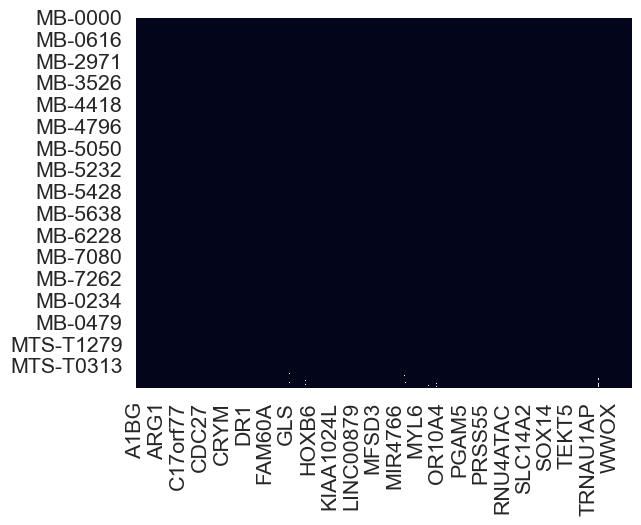

In [160]:
#check if there are any missing data 
sns.heatmap(df_cna.isnull(), cbar=False)

since the missing data is not a lot, I decide to drop the null rows instead of fill it with a value which might not be accurate. 

In [6]:
df_cna.dropna(inplace=True)

we lost the data for Breast Angiosarcoma which only has 2 samples

## Data Visualization 

In [7]:
X,y  = df_cna.drop('cancer', axis=1), df_cna[['cancer']].values.flatten()

<AxesSubplot:>

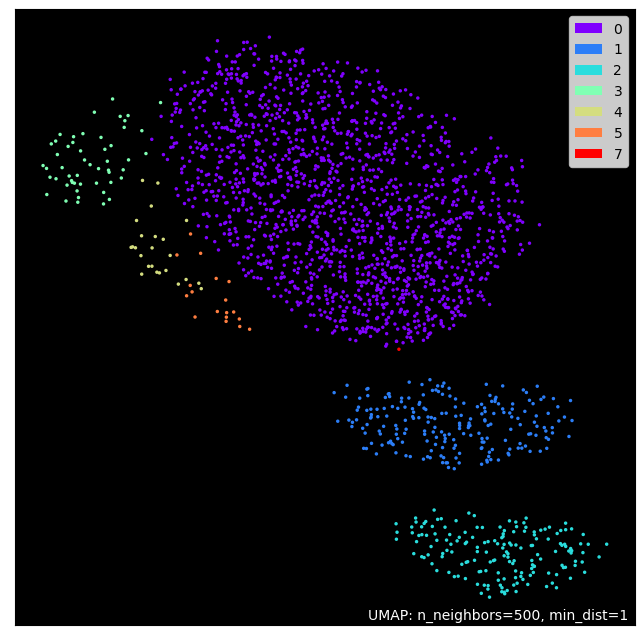

In [8]:
import umap 
import umap.plot
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline 

pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())

manifold = umap.UMAP(n_neighbors = 500, min_dist = 1).fit(X, y)

umap.plot.points(manifold, labels=y, theme="fire")


0: Breast Invasive Ductal Carcinoma \
1: Breast Mixed Ductal and Lobular Carcinoma\
2: Breast Invasive Lobular Carcinoma\
3: Invasive Breast Carcinoma\
4: Breast Invasive Mixed Mucinous Carcinoma\
5: Breast\
7: Metaplastic Breast Cancer 

In [9]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 7], dtype=object),
 array([1615,  213,  168,   52,   24,   18,    1]))

Because there is only 1 sample for cancer 7:  Metaplastic Breast Cancerk, and this data is not clearly separable from other datapoints according to the graphs above, I drop this data from the data set. 

In [10]:
df_cna.drop(df_cna.index[df_cna['cancer'] == 7], inplace = True)
X,y  = df_cna.drop('cancer', axis=1), df_cna[['cancer']].values.flatten()
y=y.astype('int')
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1615,  213,  168,   52,   24,   18]))

## Split the data into training and testing 

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=1, stratify=y)
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1292,  171,  134,   42,   19,   14]))

# UMAP SVM 

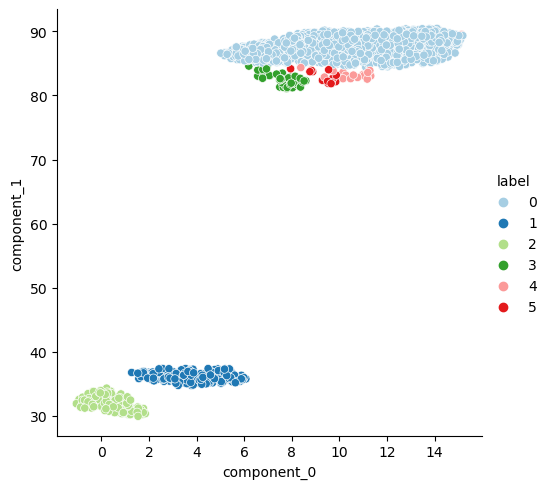

In [17]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from umap import UMAP

mapper = umap.UMAP(n_neighbors = 1000, min_dist = 1).fit(x_train, y_train)
umap_component= mapper.transform(x_train)
umap_df = pd.DataFrame(data=umap_component,columns=['component_%i' % i for i in range(2)])
umap_df=umap_df.join(pd.DataFrame(y_train,columns=['label']))
umap_component_test= mapper.transform(x_test)
umap_df_test = pd.DataFrame(data=umap_component_test,columns=['component_%i' % i for i in range(2)])
umap_df_test=umap_df_test.join(pd.DataFrame(y_test,columns=['label']))
sns.relplot(x="component_0", y="component_1", hue="label", data=umap_df, palette="Paired")

In [25]:
from sklearn.svm import SVC

x_train_umap,y_train_umap=umap_component,umap_df['label']
X_test_umap, y_test_umap=umap_component_test,umap_df_test['label']
svc = SVC(class_weight='balanced')
svc.fit(x_train_umap,y_train_umap)
y_pred_svc = svc.predict(X_test_umap)
accuracy_score(y_pred_svc, y_test_umap)

0.17703349282296652

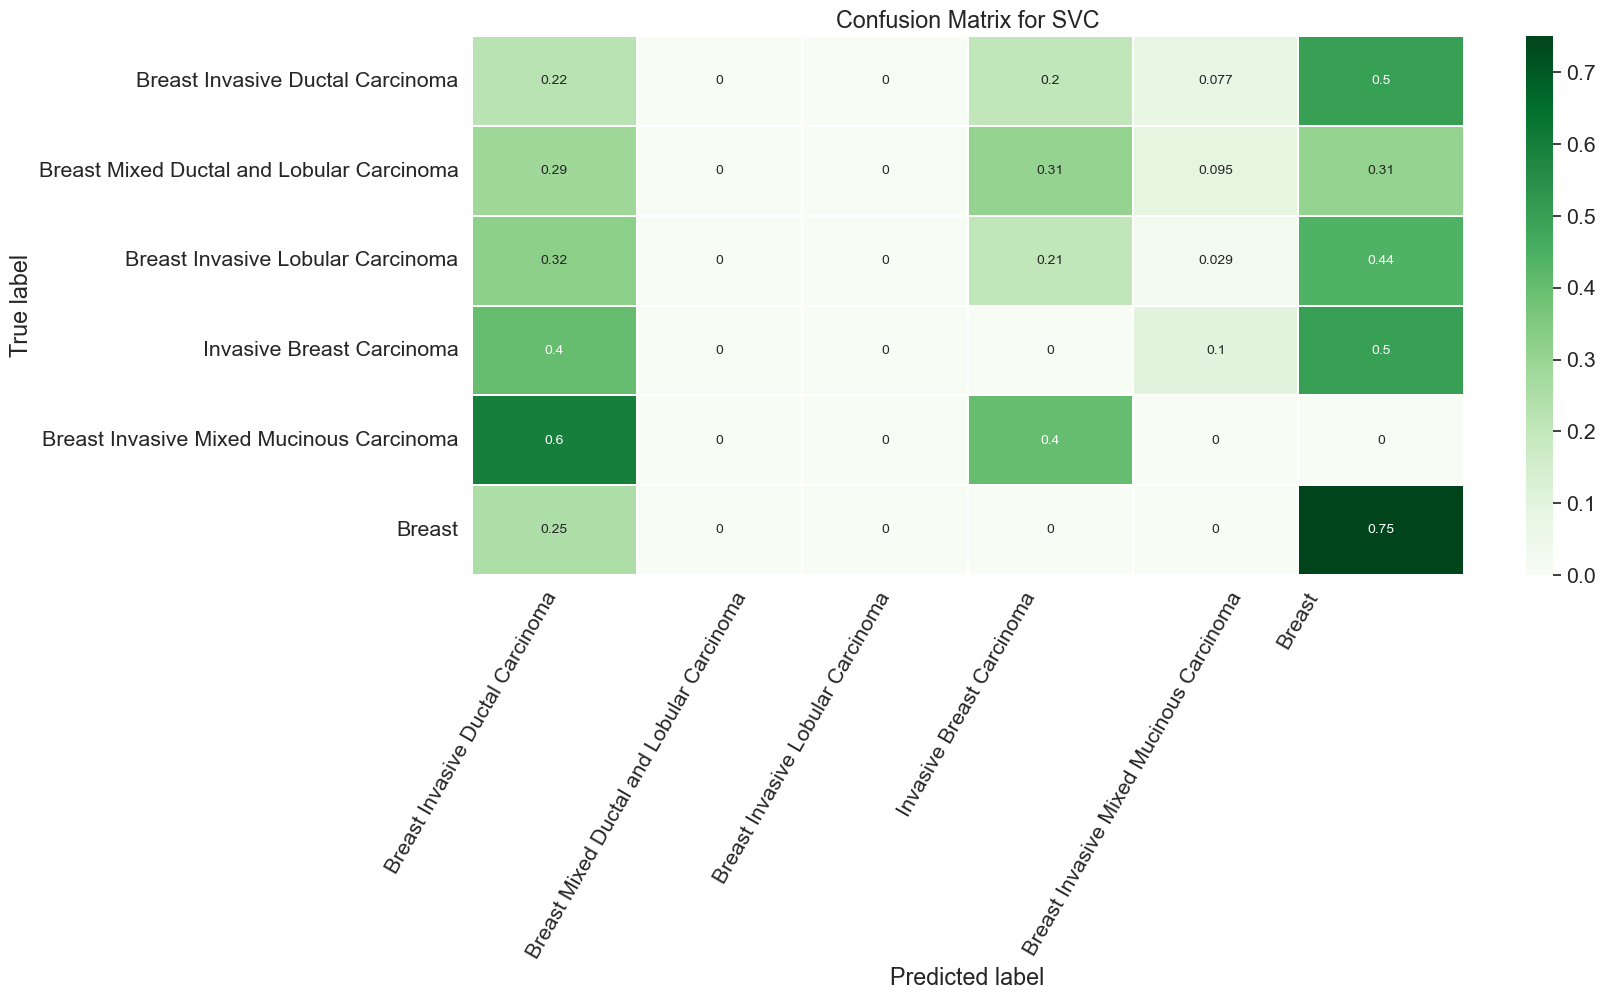

In [31]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_umap, y_pred_svc)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Breast Invasive Ductal Carcinoma', 'Breast Mixed Ductal and Lobular Carcinoma',
'Breast Invasive Lobular Carcinoma', 'Invasive Breast Carcinoma', 'Breast Invasive Mixed Mucinous Carcinoma',
'Breast']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC')
plt.show()

In [27]:
print(classification_report(y_test_umap, y_pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.22      0.33       323
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         5
           5       0.02      0.75      0.03         4

    accuracy                           0.18       418
   macro avg       0.12      0.16      0.06       418
weighted avg       0.54      0.18      0.26       418



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## UMAP KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_umap, y_train_umap)
y_pred_knn=knn.predict(X_test_umap)
accuracy_score(y_pred_knn,y_test_umap)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6483253588516746

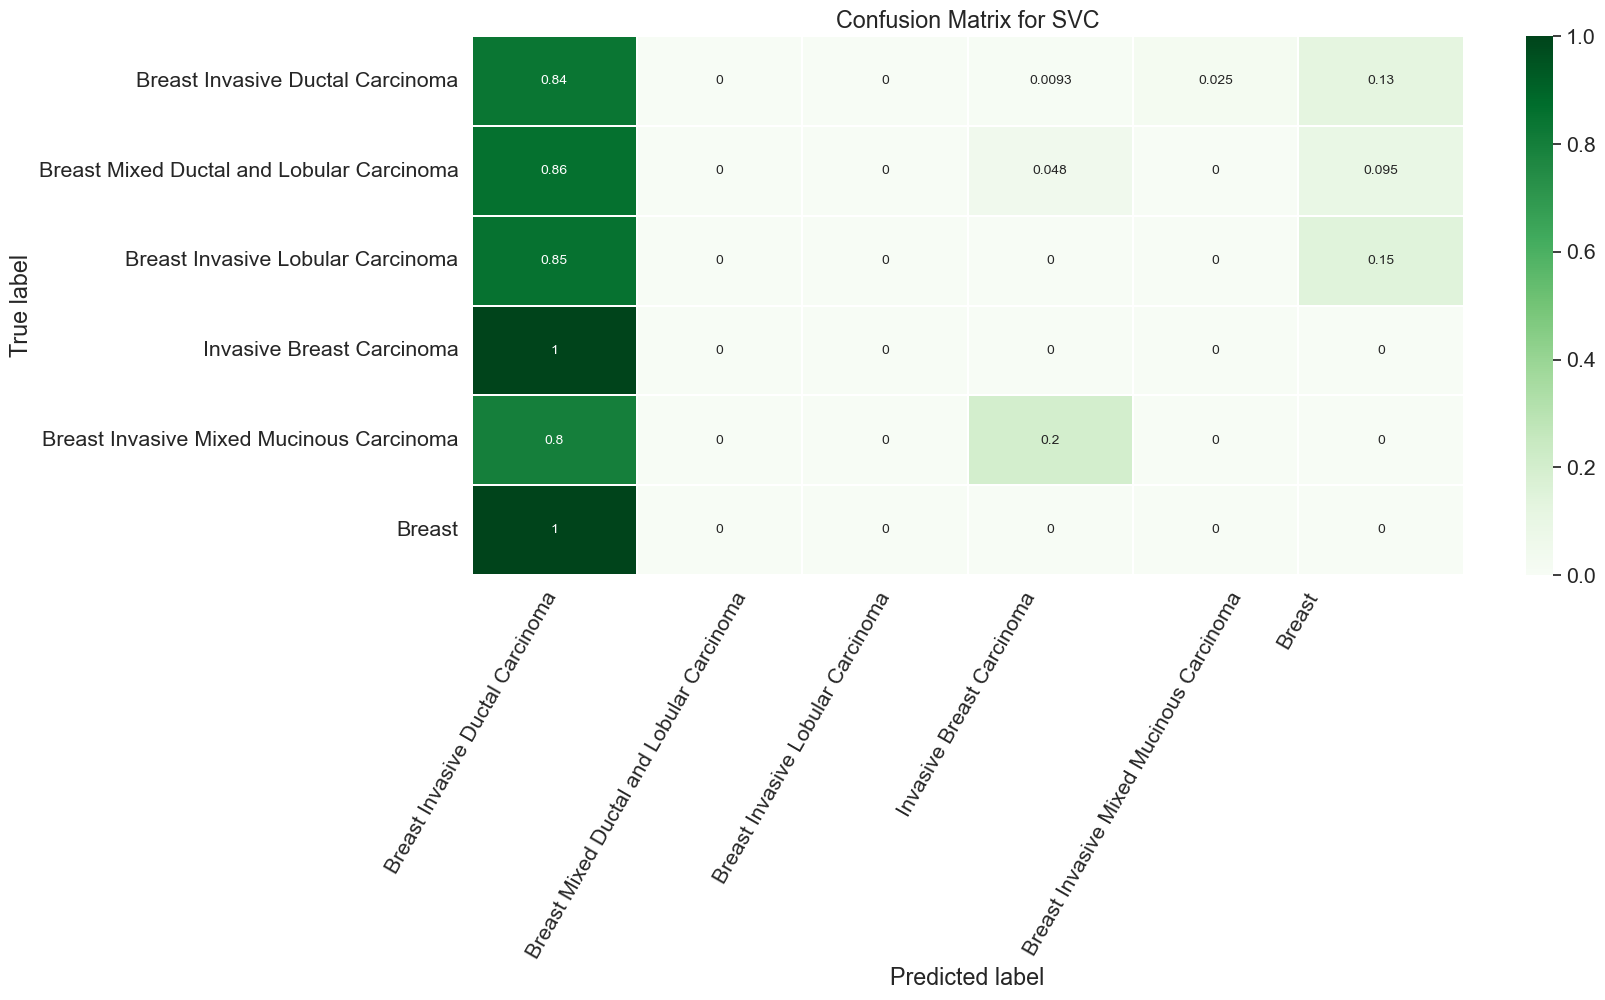

In [47]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_umap, y_pred_knn)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC')
plt.show()

In [48]:
print(classification_report(y_test_umap, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       323
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4

    accuracy                           0.65       418
   macro avg       0.13      0.14      0.13       418
weighted avg       0.59      0.65      0.62       418



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## random forest 

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

forest = RandomForestClassifier(n_estimators=1000, class_weight='balanced').fit(x_train, y_train)
y_pred_forest = forest.predict(x_test)
accuracy_score(y_test, y_pred_forest)

0.7535885167464115

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, forest.predict_proba(X), multi_class='ovo', average = 'macro')

0.9589653107150454

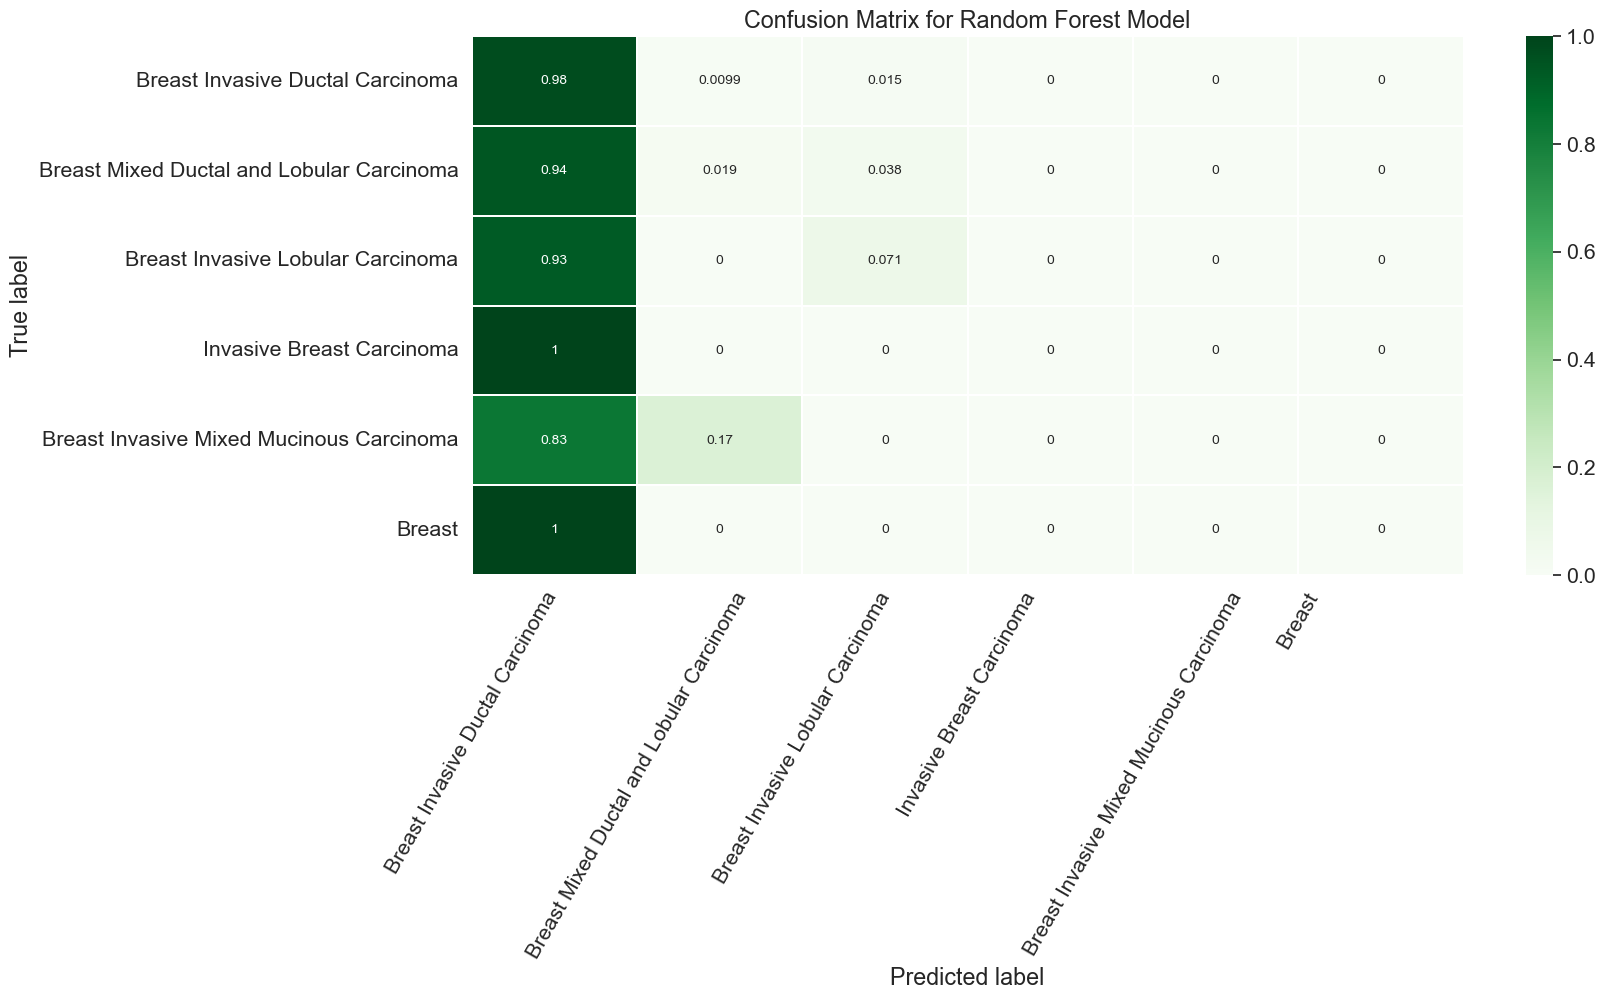

In [140]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Breast Invasive Ductal Carcinoma', 'Breast Mixed Ductal and Lobular Carcinoma',
'Breast Invasive Lobular Carcinoma', 'Invasive Breast Carcinoma', 'Breast Invasive Mixed Mucinous Carcinoma',
'Breast']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [112]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       404
           1       0.20      0.02      0.03        53
           2       0.22      0.05      0.08        42
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         5

    accuracy                           0.76       523
   macro avg       0.20      0.17      0.16       523
weighted avg       0.64      0.76      0.68       523



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression 

In [173]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", class_weight='balanced', max_iter = 2500).fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_score(y_test, y_pred_lr)

0.6290630975143403

In [150]:
roc_auc_score(y, lr.predict_proba(X), multi_class='ovo', average = 'macro')

0.899574896191721

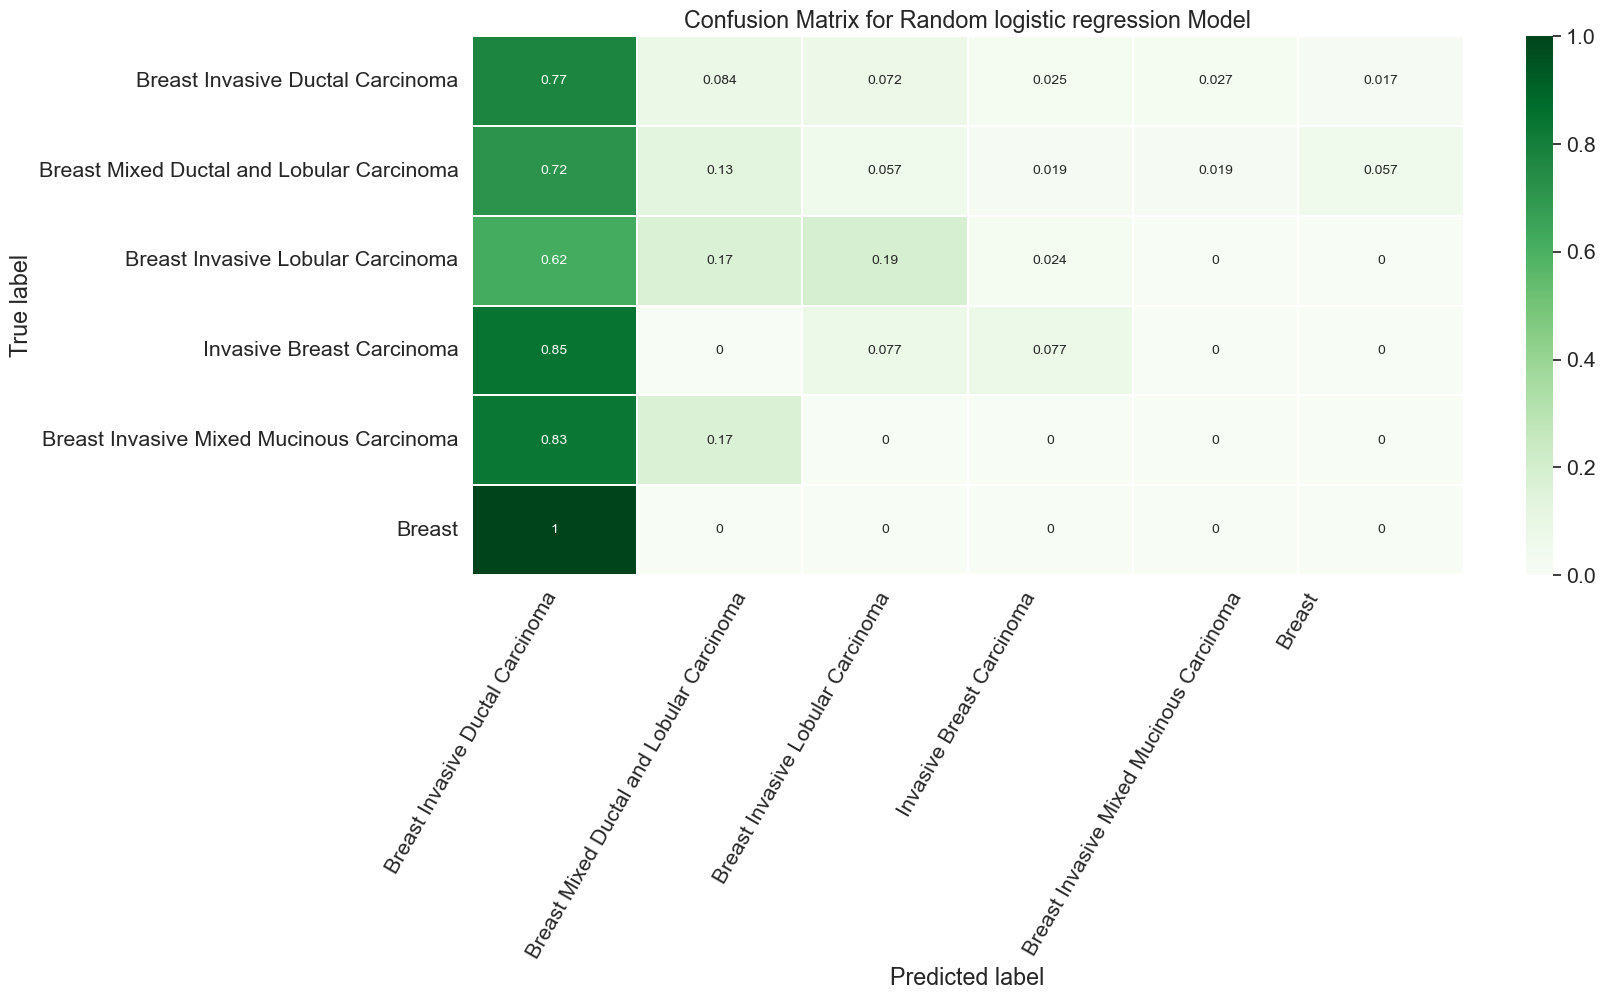

In [151]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_lr)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Breast Invasive Ductal Carcinoma', 'Breast Mixed Ductal and Lobular Carcinoma',
'Breast Invasive Lobular Carcinoma', 'Invasive Breast Carcinoma', 'Breast Invasive Mixed Mucinous Carcinoma',
'Breast']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random logistic regression Model')
plt.show()

In [152]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       404
           1       0.14      0.13      0.14        53
           2       0.20      0.19      0.19        42
           3       0.08      0.08      0.08        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         5

    accuracy                           0.63       523
   macro avg       0.20      0.20      0.20       523
weighted avg       0.64      0.63      0.63       523



use pca and do logistic regression 

Variances (Percentage):
[8.21199067e+00 4.76682367e+00 4.16871214e+00 3.07839456e+00
 2.67028646e+00 2.38990215e+00 2.30381343e+00 2.05469544e+00
 1.94401882e+00 1.83436344e+00 1.75118577e+00 1.68465203e+00
 1.63801384e+00 1.53450433e+00 1.50355317e+00 1.47980112e+00
 1.38550191e+00 1.35334060e+00 1.32990753e+00 1.31114232e+00
 1.23404610e+00 1.15880977e+00 1.10490843e+00 1.03363342e+00
 1.01035074e+00 9.80002507e-01 9.51456304e-01 9.46204073e-01
 8.80922095e-01 8.53797698e-01 7.82142663e-01 7.56186643e-01
 7.38520983e-01 6.95372214e-01 6.71926480e-01 6.37045150e-01
 6.21065421e-01 5.92751365e-01 5.54816263e-01 5.36490958e-01
 5.27369197e-01 5.17697177e-01 4.98226352e-01 4.77713918e-01
 4.59842513e-01 4.57801106e-01 4.41073953e-01 4.26847174e-01
 4.16561979e-01 4.07100463e-01 3.89591914e-01 3.74583567e-01
 3.71823934e-01 3.51809947e-01 3.40771337e-01 3.33004506e-01
 3.30003244e-01 3.13450790e-01 3.07968657e-01 3.02548331e-01
 2.94325050e-01 2.85409103e-01 2.70339659e-01 2.64900433e-01


Text(0, 0.5, 'Explained variance (%)')

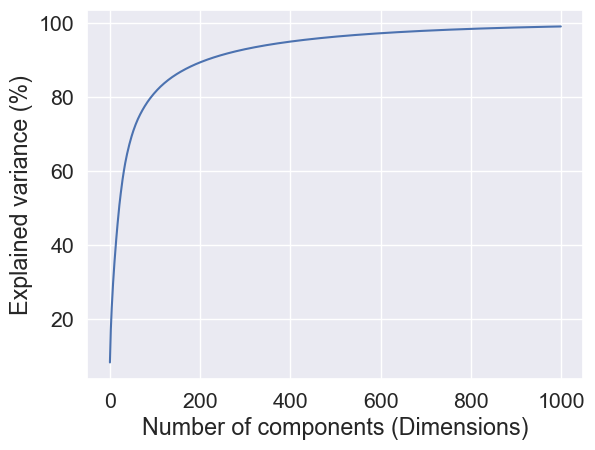

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=250)
pca.fit(X_scaled)

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

From this graph we can see that 250 components would account for nearly 90 percent of the data. Also, when I play aroud the UMAP, I found the cluster can be clearly separated when n_neighbors is above 250. Thus, I would keep 250 first components when doing pca. 

In [177]:
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, 
                                                            shuffle=True, random_state=2, stratify=y)
lr = LogisticRegression(solver="lbfgs", class_weight='balanced', max_iter = 5000)
lr.fit(X_train_pca, y_train)
y_pred_lr_pca = lr.predict(X_test_pca)
accuracy_score(y_test, y_pred_lr)

0.5927342256214149

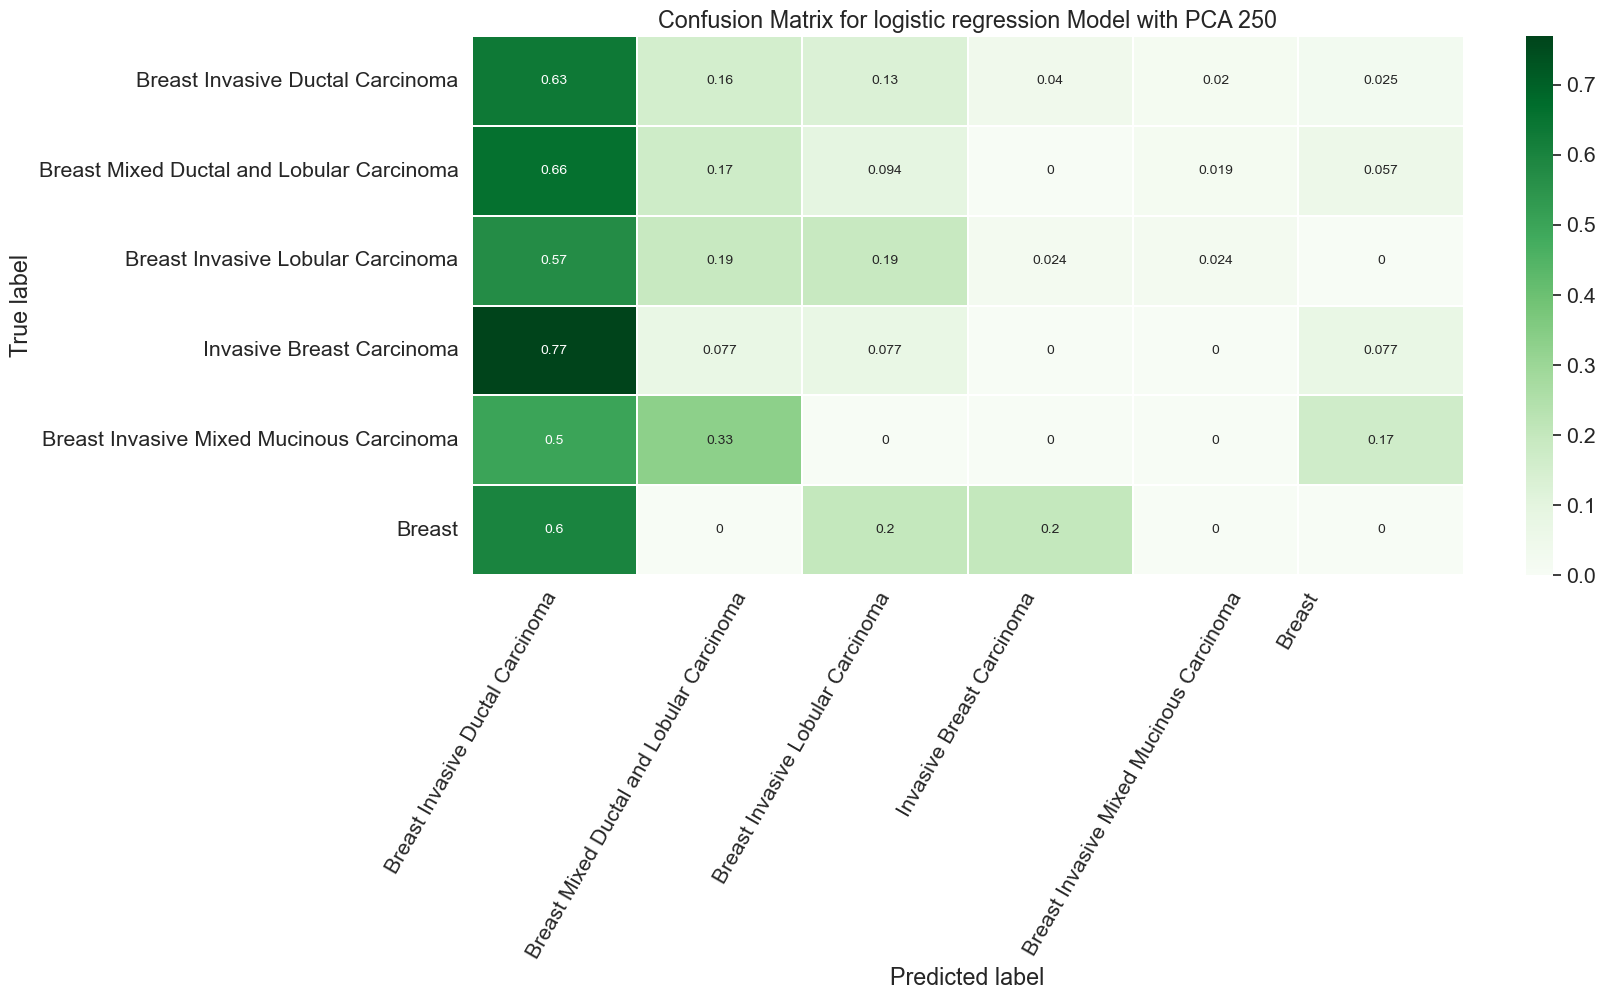

In [178]:
matrix = confusion_matrix(y_test, y_pred_lr_pca)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for logistic regression Model with PCA 250')
plt.show()

Seems like applying pca does not help on logistic regerssion 